In [142]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
import matplotlib.dates as mdates
import matplotlib.image as mpimg


In [21]:
file = "pm_dashboard_data.csv"
df = pd.read_csv(file)

df.head()

,Name of Structure,Inflow_Discharge,Outflow_Discharge,River,Date
0,Taunsa,158775.0,133869.0,Indus,15/06/2025 6:00
1,Tarbela Dam,178000.0,151700.0,Indus,15/06/2025 6:00
2,Sulemanki,14862.0,2654.0,Sutlej,15/06/2025 6:00
3,Sukkur,80240.0,32400.0,Indus,15/06/2025 6:00
4,Sidhnai,11200.0,0.0,Ravi,15/06/2025 6:00


In [22]:
df["Name of Structure"].unique()

array(['Taunsa', 'Tarbela Dam', 'Sulemanki', 'Sukkur', 'Sidhnai', 'Rasul',
       'Q.Abad', 'Panjnad', 'Marala', 'Mangla Dam', 'Kotri', 'Khanki',
       'Kalabagh', 'KABUL', 'Jassar', 'Islam', 'Guddu',
       'Ganda Singh Wala', 'Chashma', 'Balloki', 'Trimmu', 'Shahdara',
       'Thein Dam', 'Harike', 'Bhakra Dam', 'Pong Dam', 'Skardu',
       'Partab Bridge (Bunji)', 'Muzaffarabad', 'Kotli', 'Domel',
       'Chattar Klass', 'Besham', 'Azad Pattan', 'Chiniot'], dtype=object)

In [23]:
df_pong = df[df["Name of Structure"] == "Pong Dam"].copy()
df_pong["Date"] = pd.to_datetime(df_pong["Date"], dayfirst=True)
df_pong.set_index("Date", inplace=True)

df_bhakra = df[df["Name of Structure"] == 'Bhakra Dam'].copy()
df_bhakra["Date"] = pd.to_datetime(df_bhakra["Date"], dayfirst=True)
df_bhakra.set_index("Date", inplace=True)

df_Thein = df[df["Name of Structure"] == 'Thein Dam'].copy()
df_Thein["Date"] = pd.to_datetime(df_Thein["Date"], dayfirst=True)
df_Thein.set_index("Date", inplace=True)

df_pong.head()


,Name of Structure,Inflow_Discharge,Outflow_Discharge,River
Date,,,,
2025-06-25 06:00:00,Pong Dam,17378.0,9508.0,Byas
2025-06-26 06:00:00,Pong Dam,34939.0,9512.0,Byas
2025-07-01 06:00:00,Pong Dam,95347.0,6000.0,Byas
2025-07-02 06:00:00,Pong Dam,203953.0,7501.0,Byas
2025-07-03 06:00:00,Pong Dam,26547.0,13267.0,Byas


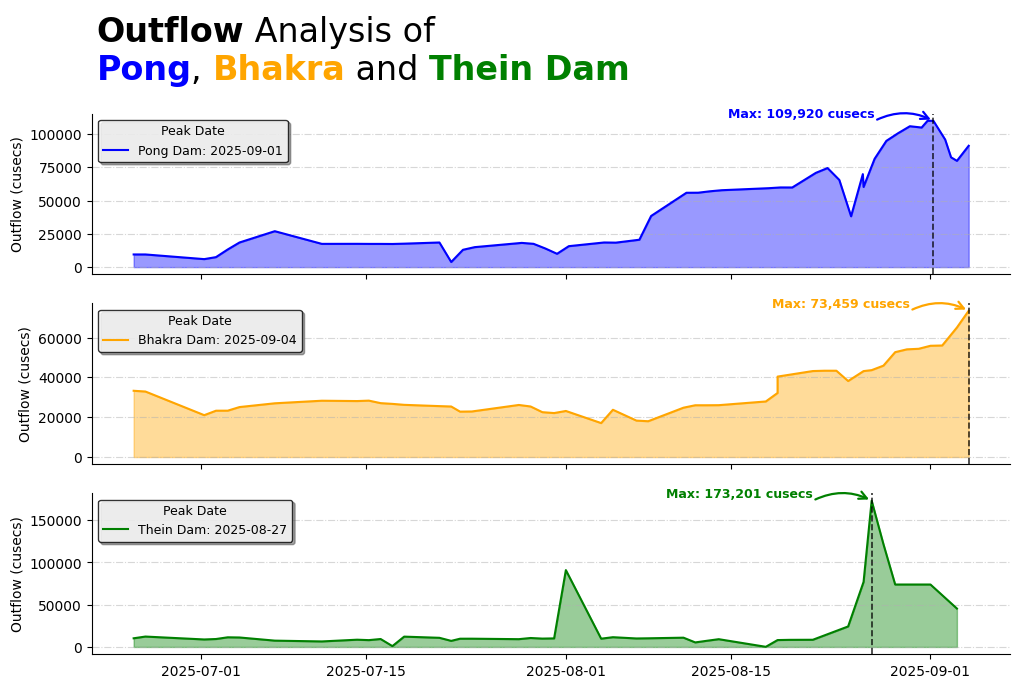

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100, nrows=3, sharex=True)
fig.tight_layout()


ax[0].plot(df_pong.index, df_pong["Outflow_Discharge"], color="blue")
ax[0].fill_between(df_pong.index, df_pong["Outflow_Discharge"], color="blue", alpha=.4, label="Pong Dam")

ax[1].plot(df_bhakra.index, df_bhakra["Outflow_Discharge"], color="orange")
ax[1].fill_between(df_bhakra.index, df_bhakra["Outflow_Discharge"], color="orange", alpha=.4, label="Bhakra Dam")

ax[2].plot(df_Thein.index, df_Thein["Outflow_Discharge"], color="green")
ax[2].fill_between(df_Thein.index, df_Thein["Outflow_Discharge"], color="green", alpha=.4, label="Thein Dam")


for eachAx, df, name, color in zip(
    ax, 
    [df_pong, df_bhakra, df_Thein], 
    ["Pong Dam", "Bhakra Dam", "Thein Dam"],
    ["blue", "orange", "green"]
):
    eachAx.grid(axis="y", alpha=0.5, linestyle="-.")

    peak_idx = df["Outflow_Discharge"].idxmax()
    peak_val = df["Outflow_Discharge"].max()


    eachAx.axvline(peak_idx, linestyle="--", color="black", linewidth=1.2, alpha=0.8)


    eachAx.set(ylabel="Outflow (cusecs)")
    eachAx.legend(
        title="Peak Date",
        labels=[f"{name}: {peak_idx.date()}"],
        fontsize=9,
        title_fontsize=9,
        loc="upper left",
        frameon=True,
        fancybox=True,
        shadow=True,
        framealpha=0.8,
        facecolor="white",
        edgecolor="black"
    )

    tail_x = peak_idx - pd.Timedelta(days=5)
    tail_y = peak_val
    head_x = peak_idx
    head_y = peak_val


    arrow = FancyArrowPatch(
        (tail_x, tail_y), (head_x, head_y),
        connectionstyle="arc3,rad=-0.25",  
        arrowstyle="->",
        mutation_scale=14,
        color=color,
        lw=1.6,
        transform=eachAx.transData,   
        clip_on=False                 
    )
    eachAx.add_patch(arrow)


    eachAx.text(
        tail_x, tail_y,
        f"Max: {peak_val:,.0f} cusecs",
        ha="right", va="bottom",
        fontsize=9, fontweight="bold", color=color
    )

sns.despine()


text = """<Outflow> Analysis of\n<Pong>, <Bhakra> and <Thein Dam>
"""
fig_text(0.06, 1.13, text, fontsize=24, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold"} ,{"fontweight": "bold", "color": "blue"}, {"fontweight": "bold", "color": "orange"}, {"fontweight": "bold", "color": "green"}])

fig.savefig("easternSideOutFlows.png", dpi=600, bbox_inches='tight')

In [34]:
dt = (df_pong.index[1] - df_pong.index[0]).total_seconds()
net_flow = df_pong["Inflow_Discharge"] - df_pong["Outflow_Discharge"]
dV = net_flow * dt

volume_in = np.trapezoid (df_pong["Inflow_Discharge"], dx=dt)
volume_out = np.trapezoid (df_pong["Outflow_Discharge"], dx=dt)
delta_s = volume_in - volume_out
print(f"Total Amount of water released by India from Pong Dam till 04 Aug 2025: {delta_s * 1e-9 / 35.3147:.2f} BCM")

Total Amount of water released by India from Pong Dam till 04 Aug 2025: 3.92 BCM


In [35]:
volume_in = np.trapezoid (df_bhakra["Inflow_Discharge"], dx=dt)
volume_out = np.trapezoid (df_bhakra["Outflow_Discharge"], dx=dt)
delta_s = volume_in - volume_out
print(f"Total Amount of water released by India from Bhakra Dam till 04 Aug 2025: {delta_s * 1e-9 / 35.3147:.2f} BCM")

Total Amount of water released by India from Bhakra Dam till 04 Aug 2025: 2.52 BCM


In [36]:
volume_in = np.trapezoid (df_Thein["Inflow_Discharge"], dx=dt)
volume_out = np.trapezoid (df_Thein["Outflow_Discharge"], dx=dt)
delta_s = volume_in - volume_out
print(f"Total Amount of water released by India from Thein Dam till 04 Aug 2025: {delta_s * 1e-9 / 35.3147:.2f} BCM")

Total Amount of water released by India from Thein Dam till 04 Aug 2025: 0.61 BCM


In [37]:
print(f"total water from pong and bhakra dam: {2.52 + 3.92:.2f} BCM")
print(f"Arrigation diverted water: {6.44 - 2.55:.2f} BCM")

total water from pong and bhakra dam: 6.44 BCM
Arrigation diverted water: 3.89 BCM


In [31]:
harike = pd.read_csv("pm_dashboard_data.csv")
harike["Date"] = pd.to_datetime(harike["Date"], dayfirst=True)
harike = harike.set_index("Date")
harike = harike.loc[harike["Name of Structure"] == "Harike"]
harike

,Name of Structure,Inflow_Discharge,Outflow_Discharge,River
Date,,,,
2025-06-25 06:00:00,Harike,19996.0,2010.0,Sutlej
2025-06-27 06:00:00,Harike,21496.0,2010.0,Sutlej
2025-07-01 06:00:00,Harike,22498.0,2010.0,Sutlej
2025-07-03 06:00:00,Harike,19500.0,2036.0,Sutlej
2025-07-07 06:00:00,Harike,24286.0,3000.0,Sutlej
2025-07-07 06:00:00,Harike,24622.0,2036.0,Sutlej
2025-07-08 06:00:00,Harike,24596.0,2010.0,Sutlej
2025-07-10 06:00:00,Harike,24925.0,2036.0,Sutlej
2025-07-11 06:00:00,Harike,24964.0,2036.0,Sutlej


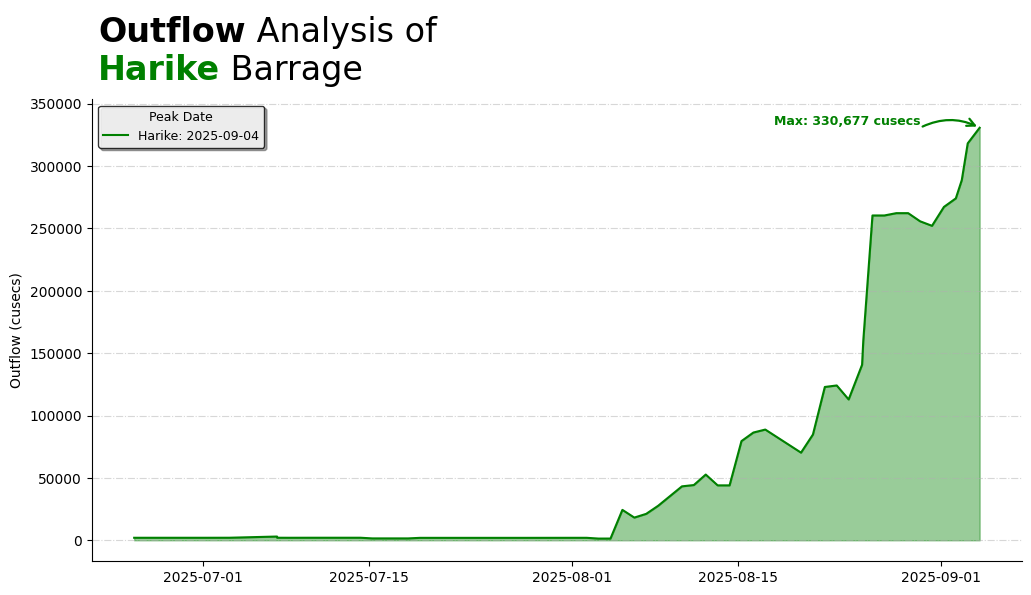

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid(axis="y", alpha=0.5, linestyle="-.")
ax.plot(harike.index, harike["Outflow_Discharge"], color="green")
ax.fill_between(harike.index, harike["Outflow_Discharge"], color="green", alpha=.4)

peak_idx = harike["Outflow_Discharge"].idxmax()
peak_val = harike["Outflow_Discharge"].max()


tail_x = peak_idx - pd.Timedelta(days=5)
tail_y = peak_val
head_x = peak_idx
head_y = peak_val


arrow = FancyArrowPatch(
    (tail_x, tail_y), (head_x, head_y),
    connectionstyle="arc3,rad=-0.25",  
    arrowstyle="->",
    mutation_scale=14,
    color="green",   # ✅ fixed
    lw=1.6,
    transform=ax.transData,
    clip_on=False
)
ax.add_patch(arrow)

ax.text(
    tail_x, tail_y,
    f"Max: {peak_val:,.0f} cusecs",
    ha="right", va="bottom",
    fontsize=9, fontweight="bold", color="green"  # ✅ fixed
)

ax.legend(
    title="Peak Date",
    labels=[f"Harike: {peak_idx.date()}"],
    fontsize=9,
    title_fontsize=9,
    loc="upper left",
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.8,
    facecolor="white",
    edgecolor="black"
)

text = """<Outflow> Analysis of\n<Harike> Barrage
"""
fig_text(0.13, 1.02, text, fontsize=24, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold"} ,{"fontweight": "bold", "color": "green"}])

sns.despine()

ax.set(ylabel="Outflow (cusecs)")
fig.savefig("outFlowAnalysisOfHarike.png", dpi=600, bbox_inches='tight')

In [43]:
volume_in = np.trapezoid (harike["Inflow_Discharge"], dx=dt)
volume_out = np.trapezoid (harike["Outflow_Discharge"], dx=dt)
delta_s = volume_in - volume_out
print(f"Total Amount of water released from Harike till 04 Aug 2025: {delta_s * 1e-9 / 35.3147:.2f} BCM")

Total Amount of water released from Harike till 04 Aug 2025: 2.55 BCM


In [44]:
gsWala = pd.read_csv("pm_dashboard_data.csv")
gsWala["Date"] = pd.to_datetime(gsWala["Date"], dayfirst=True)
gsWala = gsWala.set_index("Date")
gsWala = gsWala.loc[gsWala["Name of Structure"] == "Ganda Singh Wala"].copy()
gsWala

,Name of Structure,Inflow_Discharge,Outflow_Discharge,River
Date,,,,
2025-06-15 06:00:00,Ganda Singh Wala,0.0,0.0,Sutlej
2025-06-15 18:00:00,Ganda Singh Wala,300.0,360.0,Sutlej
2025-06-16 06:00:00,Ganda Singh Wala,300.0,360.0,Sutlej
2025-06-16 12:00:00,Ganda Singh Wala,300.0,360.0,Sutlej
2025-06-16 18:00:00,Ganda Singh Wala,300.0,360.0,Sutlej
...,...,...,...,...
2025-09-03 03:14:00,Ganda Singh Wala,269501.0,269501.0,Sutlej
2025-09-03 08:53:00,Ganda Singh Wala,269501.0,269501.0,Sutlej
2025-09-03 10:40:00,Ganda Singh Wala,269501.0,269501.0,Sutlej


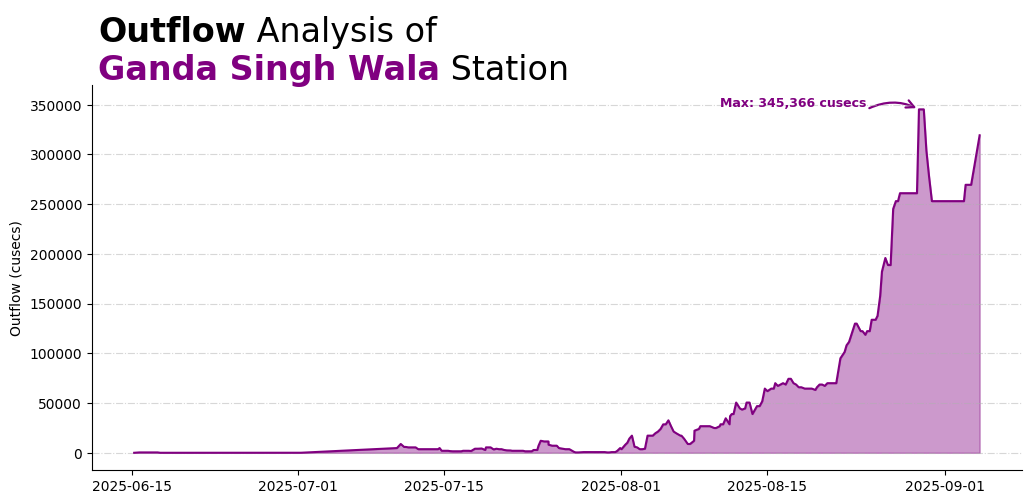

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid(axis="y", alpha=0.5, linestyle="-.")
ax.plot(gsWala.index, gsWala["Outflow_Discharge"], color="purple")
ax.fill_between(gsWala.index, gsWala["Outflow_Discharge"], color="purple", alpha=.4)

peak_idx = gsWala["Outflow_Discharge"].idxmax()
peak_val = gsWala["Outflow_Discharge"].max()


tail_x = peak_idx - pd.Timedelta(days=5)
tail_y = peak_val
head_x = peak_idx
head_y = peak_val


arrow = FancyArrowPatch(
    (tail_x, tail_y), (head_x, head_y),
    connectionstyle="arc3,rad=-0.25",  
    arrowstyle="->",
    mutation_scale=14,
    color="purple",
    lw=1.6,
    transform=ax.transData,   
    clip_on=False                 
)
ax.add_patch(arrow)

ax.text(
    tail_x, tail_y,
    f"Max: {peak_val:,.0f} cusecs",
    ha="right", va="bottom",
    fontsize=9, fontweight="bold", color="purple"
)

ax.set(ylabel="Outflow (cusecs)")

text = """<Outflow> Analysis of\n<Ganda Singh Wala> Station
"""
fig_text(0.13, 1.02, text, fontsize=24, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold"} ,{"fontweight": "bold", "color": "purple"}])

sns.despine()

fig.savefig("outFlowAnalysisOfGSWala.png", dpi=600, bbox_inches='tight')

In [ ]:
gsWala = gsWala.loc[gsWala.index > "2025-08-26"].copy()
volume_in = np.trapezoid(gsWala["Inflow_Discharge"], dx=dt)
print(f"Total Amount of water released from G.S.Wala till 04 Aug 2025: {volume_in * 1 / (43560 * 1e6):.2f} MAF")

Total Amount of water released from G.S.Wala till 04 Aug 2025: 20.35 MAF


In [ ]:
Jassar = pd.read_csv("pm_dashboard_data.csv")
Jassar["Date"] = pd.to_datetime(Jassar["Date"], dayfirst=True)
Jassar = Jassar.set_index("Date")
Jassar = Jassar.loc[Jassar["Name of Structure"] == "Jassar"].copy()
volume_in = np.trapezoid (Jassar["Inflow_Discharge"], dx=dt)
#print(f"Total Amount of water released from Jassar till 04 Aug 2025: {volume_in * 1e-9 / 35.3147:.2f} BCM")
print(f"Total Amount of water released from Jassar till 04 Aug 2025: {volume_in * 1 / (43560 * 1e6):.2f} MAF")

Total Amount of water released from Jassar till 04 Aug 2025: 12.71 BCM


In [61]:
gsWala["timeDifference"] = gsWala.index.diff().total_seconds()
gsWala["timeDifference"] = gsWala["timeDifference"].fillna(0)
gsWala['volume_acft'] = gsWala['Inflow_Discharge'] * gsWala['timeDifference'] / 43560
gsWala['volume_maf'] = gsWala['volume_acft'] / 1e6

total_maf_by_river = gsWala['volume_maf'].sum()

gsWala.head()
print(total_maf_by_river)

4.788064778236914


1.7834079283746558


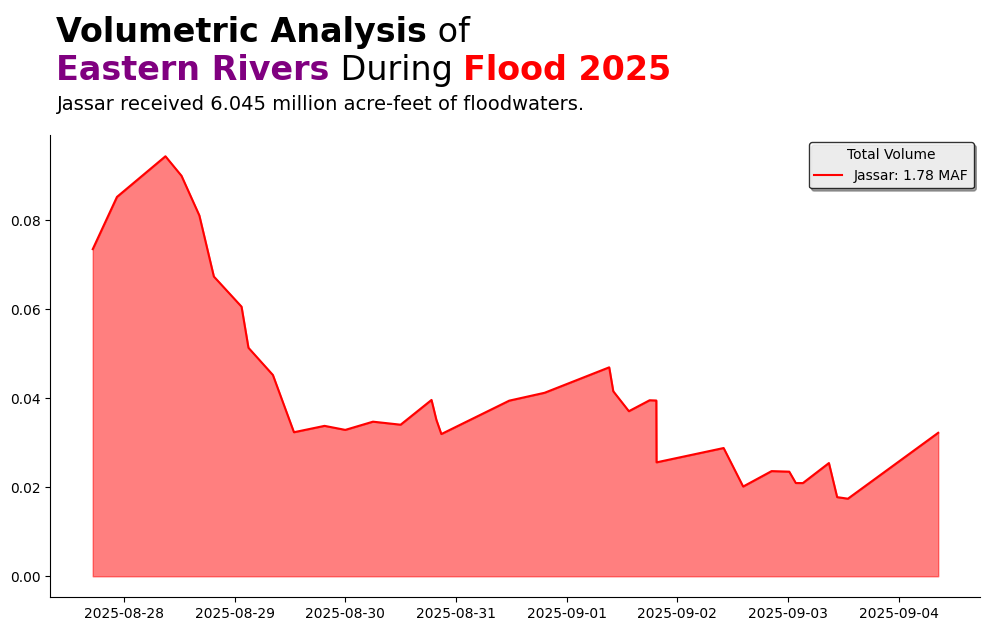

In [116]:
Jassar = pd.read_csv("pm_dashboard_data.csv")
Jassar["Date"] = pd.to_datetime(Jassar["Date"], dayfirst=True)
Jassar = Jassar.set_index("Date")
Jassar = Jassar.loc[Jassar["Name of Structure"] == "Jassar"].copy()
Jassar = Jassar.loc[Jassar.index > "2025-08-26"].copy()
Jassar["timeDifference"] = Jassar.index.diff().total_seconds()
Jassar["timeDifference"] = Jassar["timeDifference"].fillna(0)
Jassar['volume_acft'] = Jassar['Inflow_Discharge'] * Jassar['timeDifference'] / 43560
Jassar['volume_maf'] = Jassar['volume_acft'] / 1e6

total_maf_by_river = Jassar['volume_maf'].sum()
print(total_maf_by_river)


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Jassar.index, Jassar["volume_maf"].rolling(7).mean(), label="Jassar", color="red")
ax.fill_between(Jassar.index, Jassar["volume_maf"].rolling(7).mean(), label="Jassar", color="red", alpha=.5)
ax.legend(
title="Total Volume",
labels=[f"{"Jassar"}: {1.7834079283746558:.2f} MAF"],
fontsize=10,
title_fontsize=10,
loc="upper right",
frameon=True,
fancybox=True,
shadow=True,
framealpha=0.8,
facecolor="white",
edgecolor="black")



text = """<Volumetric Analysis> of\n<Eastern Rivers> During <Flood 2025>
"""
fig_text(0.13, 1.08, text, fontsize=24, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold"} ,{"fontweight": "bold", "color": "purple"},{"fontweight": "bold", "color": "red"}])

text = """Jassar received 6.045 million acre-feet of floodwaters.
"""
fig_text(0.13, 0.948, text, fontsize=14, ha='left', va='top', color='black')


sns.despine()



6.045231533057851


[Text(103.97222222222221, 0.5, 'Volume (MAF)')]

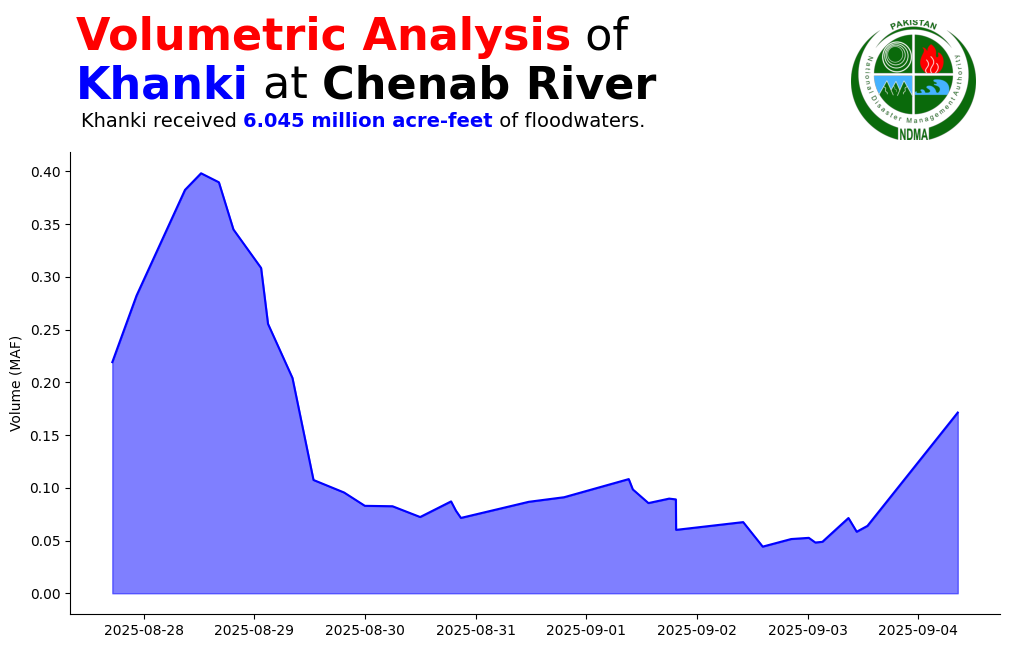

In [157]:
Khanki = pd.read_csv("pm_dashboard_data.csv")
Khanki["Date"] = pd.to_datetime(Khanki["Date"], dayfirst=True)
Khanki = Khanki.set_index("Date")
Khanki = Khanki.loc[Khanki["Name of Structure"] == "Khanki"].copy()
Khanki = Khanki.loc[Khanki.index > "2025-08-26"].copy()
Khanki["timeDifference"] = Khanki.index.diff().total_seconds()
Khanki["timeDifference"] = Khanki["timeDifference"].fillna(0)
Khanki['volume_acft'] = Khanki['Inflow_Discharge'] * Khanki['timeDifference'] / 43560
Khanki['volume_maf'] = Khanki['volume_acft'] / 1e6

total_maf_by_river = Khanki['volume_maf'].sum()
print(total_maf_by_river)


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Khanki.index, Khanki["volume_maf"].rolling(7).mean(), label="Khanki", color="blue")
ax.fill_between(Khanki.index, Khanki["volume_maf"].rolling(7).mean(), label="Khanki", color="blue", alpha=.5)
#ax.legend(
#title="Total Volume",
#labels=[f"{"Khanki"}: {6.045231533057851:.2f} MAF"],
#fontsize=10,
#title_fontsize=10,
#loc="upper right",
#frameon=True,
#fancybox=True,
#shadow=True,
#framealpha=0.8,
#facecolor="white",
#edgecolor="black")



text = """<Volumetric Analysis> of\n<Khanki> at <Chenab River>
"""
fig_text(0.13, 1.108, text, fontsize=32, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold", "color": "red"} ,{"fontweight": "bold", "color": "blue"},{"fontweight": "bold"}])

text = """Khanki received <6.045 million acre-feet> of floodwaters.
"""
fig_text(0.134, 0.948, text, fontsize=14, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold", "color": "blue"}])


sns.despine()

# Load logo
logo = mpimg.imread("ndma-logo.png")

# Add logo in figure coordinates (upper right)
newax = fig.add_axes([0.75, 0.90, 0.13, 0.20], anchor='NE', zorder=20)
newax.imshow(logo)
newax.axis("off")

ax.set(ylabel="Volume (MAF)")

In [72]:
print(f"total amount of water entering pakistan during flood 2025: {4.788064778236914 + 1.7834079283746558 + 6.045231533057851:.2f} MAF")

total amount of water entering pakistan during flood 2025: 12.62 MAF


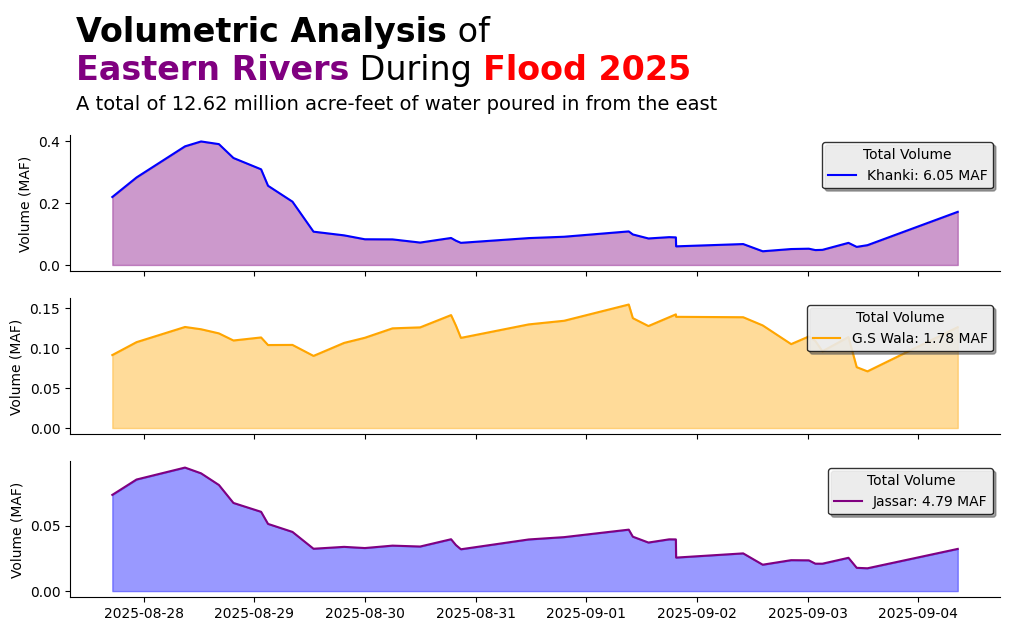

In [110]:
fig, ax = plt.subplots(figsize=(12,6), nrows=3, sharex=True)

ax[0].plot(Khanki.index, Khanki["volume_maf"].rolling(7).mean(), label="Khanki", color="blue")
ax[0].fill_between(Khanki.index, Khanki["volume_maf"].rolling(7).mean(), alpha=.4, color="purple")


ax[1].plot(gsWala.index, gsWala["volume_maf"].rolling(7).mean(), label="G.S Wala", color="orange")
ax[1].fill_between(gsWala.index, gsWala["volume_maf"].rolling(7).mean(), alpha=.4, color="orange")


ax[2].plot(Jassar.index, Jassar["volume_maf"].rolling(7).mean(), label="Jassar", color="purple")
ax[2].fill_between(Jassar.index, Jassar["volume_maf"].rolling(7).mean(), alpha=.4, color="blue")


for eachFig, station, vol in zip(ax, ["Khanki", "G.S Wala", "Jassar"], [6.045231533057851, 1.7834079283746558, 4.788064778236914]):
    eachFig.set(ylabel="Volume (MAF)")
    eachFig.legend(
    title="Total Volume",
    labels=[f"{station}: {vol:.2f} MAF"],
    fontsize=10,
    title_fontsize=10,
    loc="upper right",
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.8,
    facecolor="white",
    edgecolor="black")

text = """<Volumetric Analysis> of\n<Eastern Rivers> During <Flood 2025>
"""
fig_text(0.13, 1.08, text, fontsize=24, ha='left', va='top', color='black', highlight_textprops=[{"fontweight": "bold"} ,{"fontweight": "bold", "color": "purple"},{"fontweight": "bold", "color": "red"}])

text = """A total of 12.62 million acre-feet of water poured in from the east
"""
fig_text(0.13, 0.948, text, fontsize=14, ha='left', va='top', color='black')



sns.despine()

In [19]:
gsWala.head()

NameError: name 'gsWala' is not defined

In [207]:
volume_in = np.trapezoid (gsWala["Inflow_Discharge"], dx=dt)
#print(f"Total Amount of water released from GSWala till 04 Aug 2025: {volume_in * 1e-9 / 35.3147:.2f} BCM")
print(f"Total Amount of water released from GSWala till 04 Aug 2025: {volume_in * 1 / (43560 * 1e6):.2f} MAF")

Total Amount of water released from GSWala till 04 Aug 2025: 20.35 MAF


In [214]:
d = np.trapezoid([99470, 95580], dx=dt)
d * 1 / (43560 * 1e6)

np.float64(0.19343801652892562)

In [208]:
Khanki = pd.read_csv("pm_dashboard_data.csv")
Khanki["Date"] = pd.to_datetime(Khanki["Date"], dayfirst=True)
Khanki = Khanki.set_index("Date")
Khanki = Khanki.loc[Khanki["Name of Structure"] == "Khanki"].copy()
volume_in = np.trapezoid (Khanki["Inflow_Discharge"], dx=dt)
#print(f"Total Amount of water released from Khanki till 04 Aug 2025: {volume_in * 1e-9 / 35.3147:.2f} BCM")
print(f"Total Amount of water released from Khanki till 04 Aug 2025: {volume_in * 1 / (43560 * 1e6):.2f} MAF")

Total Amount of water released from Khanki till 04 Aug 2025: 54.71 MAF


In [209]:
print(f"total amount of water entering pakistan during flood 2025: {12.71 + 20.35 + 54.71:.2f} MAF")

total amount of water entering pakistan during flood 2025: 87.77 MAF
